In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
from keras.layers import Normalization, Input, Dense
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.model_selection import KFold

In [3]:
df = pd.read_csv('C:\\404\Python Projects\Artificial Intelligence\SUPERVISED LEARNING (REGRESSION)\Binary_Houses.csv',index_col=None)
X = df.iloc[:,1:6]
X

,Size,Bedrooms,Floors,Ages,Prices
0,952.0,2.0,1.0,65.0,271.5
1,1244.0,3.0,1.0,64.0,300.0
2,1947.0,3.0,2.0,17.0,509.8
3,1725.0,3.0,2.0,42.0,394.0
4,1959.0,3.0,2.0,15.0,540.0
...,...,...,...,...,...
95,1224.0,2.0,2.0,12.0,329.0
96,1432.0,2.0,1.0,43.0,388.0
97,1660.0,3.0,2.0,19.0,390.0
98,1212.0,3.0,1.0,20.0,356.0


In [4]:
y = df['Area']
y

0      Delhi
1     Mumbai
2      Delhi
3     Mumbai
4     Mumbai
       ...  
95    Mumbai
96     Delhi
97     Delhi
98     Delhi
99    Mumbai
Name: Area, Length: 100, dtype: object

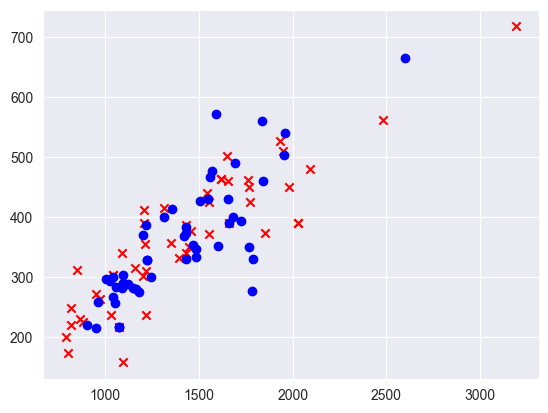

In [5]:
area_1 = df[df['Area'] == 'Delhi']
area_2 = df[df['Area'] == 'Mumbai']

plt.scatter(area_1['Size'],area_1['Prices'],marker='x',c='r')
plt.scatter(area_2['Size'],area_2['Prices'],marker='o',c='b')

In [6]:
norm = Normalization()
norm.adapt(X)
Xn = norm(X)
Xn

<tf.Tensor: shape=(100, 5), dtype=float32, numpy=
array([[-1.1201854 , -1.0879387 , -0.78288114,  1.0219113 , -0.8719024 ],
       [-0.41174465,  0.44436976, -0.78288114,  0.983129  , -0.5980501 ],
       [ 1.2938505 ,  0.44436976,  1.277333  , -0.83963466,  1.4178869 ],
       [ 0.7552416 ,  0.44436976,  1.277333  ,  0.12992048,  0.30518192],
       [ 1.3229645 ,  0.44436976,  1.277333  , -0.9171991 ,  1.7080742 ],
       [-0.24191299, -1.0879387 , -0.78288114, -0.9559813 ,  0.5069678 ],
       [-1.333688  , -1.0879387 , -0.78288114,  1.0606934 , -1.2706697 ],
       [ 1.024546  ,  0.44436976, -0.78288114, -0.83963466,  1.9002513 ],
       [-0.94064903,  0.44436976, -0.78288114,  0.16870269, -0.65570325],
       [ 4.3192806 ,  1.9766783 ,  1.277333  ,  1.8751198 ,  3.4203718 ],
       [-1.5180767 , -1.0879387 , -0.78288114,  1.6036444 , -1.5589353 ],
       [-0.518496  , -1.0879387 ,  1.277333  , -0.83963466, -0.57883245],
       [ 0.34764552, -1.0879387 , -0.78288114, -0.8008525 ,  1

In [7]:
y1 = y.apply(lambda x : 1 if x == 'Delhi' else 0)
yn = tf.convert_to_tensor(y1,dtype='float32')
yn = yn.numpy()
Xn = Xn.numpy()

In [8]:
m = Xn.shape[1]
m

5

In [9]:
X_train, X_test, y_train, y_test = train_test_split(Xn, yn, train_size=0.9)

In [10]:
model_1 = Sequential([Input(shape=(m,))])
# model.add(Input(shape=(m,)))
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 0 (0.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
# model.add(Dense(units=1,activation='relu'))
model_1.add(Dense(units=12, activation='sigmoid', input_dim=X_train.shape[1]))

In [12]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                72        
                                                                 
Total params: 72 (288.00 Byte)
Trainable params: 72 (288.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
model_1.add(Dense(units=6, activation='sigmoid'))

In [14]:
model_1.add(Dense(units=1, activation='sigmoid'))

In [15]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                72        
                                                                 
 dense_1 (Dense)             (None, 6)                 78        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 157 (628.00 Byte)
Trainable params: 157 (628.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
model_1.compile(loss='binary_crossentropy', optimizer='sgd', metrics='accuracy')

In [17]:
model_1.fit(X_train, y_train, epochs=20)

Epoch 1/20
3/3 [==============================] - 2s 9ms/step - loss: 0.6958 - accuracy: 0.5111
Epoch 2/20
3/3 [==============================] - 0s 9ms/step - loss: 0.6955 - accuracy: 0.5111
Epoch 3/20
3/3 [==============================] - 0s 8ms/step - loss: 0.6954 - accuracy: 0.5111
Epoch 4/20
3/3 [==============================] - 0s 5ms/step - loss: 0.6952 - accuracy: 0.5111
Epoch 5/20
3/3 [==============================] - 0s 6ms/step - loss: 0.6950 - accuracy: 0.5111
Epoch 6/20
3/3 [==============================] - 0s 6ms/step - loss: 0.6948 - accuracy: 0.5111
Epoch 7/20
3/3 [==============================] - 0s 4ms/step - loss: 0.6947 - accuracy: 0.5111
Epoch 8/20
3/3 [==============================] - 0s 10ms/step - loss: 0.6946 - accuracy: 0.5111
Epoch 9/20
3/3 [==============================] - 0s 6ms/step - loss: 0.6943 - accuracy: 0.5111
Epoch 10/20
3/3 [==============================] - 0s 7ms/step - loss: 0.6943 - accuracy: 0.5111
Epoch 11/20
3/3 [=====================

In [18]:
y_pred = model_1.predict(X_test)
y_hat = (y_pred >= 0.5).astype(int)
y_hat = [0.0 if x == 0 else 1 for x in y_hat]
y_hat

1/1 [==============================] - 0s 231ms/step


[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [19]:
y_hat = np.array(y_hat)
y_hat

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [20]:
type(y_hat) == type(y_test)

True

In [21]:
accuracy_score(y_test,y_hat)

0.5

In [22]:
model_2 = Sequential([Input(shape=(m,))])

In [23]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 0 (0.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
model_2.add(Dense(units=12, activation='ReLU',input_dim=X_train.shape[1]))
model_2.add(Dense(units=6,activation='ReLU'))
model_2.add(Dense(units=1,activation='sigmoid'))

In [25]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 12)                72        
                                                                 
 dense_4 (Dense)             (None, 6)                 78        
                                                                 
 dense_5 (Dense)             (None, 1)                 7         
                                                                 
Total params: 157 (628.00 Byte)
Trainable params: 157 (628.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
model_2.compile(loss='binary_crossentropy',optimizer='sgd',metrics='accuracy')

In [27]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 12)                72        
                                                                 
 dense_4 (Dense)             (None, 6)                 78        
                                                                 
 dense_5 (Dense)             (None, 1)                 7         
                                                                 
Total params: 157 (628.00 Byte)
Trainable params: 157 (628.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
model_2.fit(X_train,y_train,epochs=50)

Epoch 1/50
3/3 [==============================] - 1s 11ms/step - loss: 0.7019 - accuracy: 0.5222
Epoch 2/50
3/3 [==============================] - 0s 8ms/step - loss: 0.7015 - accuracy: 0.5222
Epoch 3/50
3/3 [==============================] - 0s 8ms/step - loss: 0.7010 - accuracy: 0.5222
Epoch 4/50
3/3 [==============================] - 0s 8ms/step - loss: 0.7006 - accuracy: 0.5222
Epoch 5/50
3/3 [==============================] - 0s 9ms/step - loss: 0.7002 - accuracy: 0.5222
Epoch 6/50
3/3 [==============================] - 0s 6ms/step - loss: 0.6998 - accuracy: 0.5222
Epoch 7/50
3/3 [==============================] - 0s 7ms/step - loss: 0.6996 - accuracy: 0.5222
Epoch 8/50
3/3 [==============================] - 0s 6ms/step - loss: 0.6992 - accuracy: 0.5222
Epoch 9/50
3/3 [==============================] - 0s 7ms/step - loss: 0.6989 - accuracy: 0.5222
Epoch 10/50
3/3 [==============================] - 0s 11ms/step - loss: 0.6987 - accuracy: 0.5222
Epoch 11/50
3/3 [====================

In [29]:
y_pred2 = model_2.predict(X_test)
y_pred2 = (y_pred2 >= 0.5).astype(int)
y_pred2 = np.array([0.0 if x == 0 else 1 for x in y_pred2])
y_pred2

1/1 [==============================] - 0s 93ms/step


array([0., 0., 0., 1., 0., 1., 0., 1., 1., 1.])

In [30]:
type(y_pred2) == type(y_test)

True

In [31]:
accuracy_score(y_test,y_pred2)

0.6

In [32]:
X['Area'] = y1
# sns.heatmap(data=df)

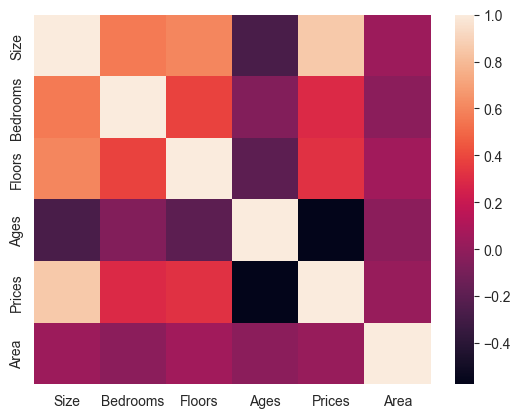

In [33]:
dataplot=sns.heatmap(X.corr())

In [34]:
# prepare cross validation
# kfold = KFold(3)
# # enumerate splits
# for train, test in kfold.split(df):
#  print('train: %s, test: %s' % (df[train], df[test]))

KeyError: "None of [Index([34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,\n       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,\n       70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87,\n       88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99],\n      dtype='int32')] are in the [columns]"

In [3]:
ddf = pd.DataFrame([[1.5,2.7,3.0],[4.2,5.1,6.8],[7.3,8.0,9.5]])
ddf

,0,1,2
0,1.5,2.7,3.0
1,4.2,5.1,6.8
2,7.3,8.0,9.5


In [4]:
ddfe = (ddf).astype(int)
ddfe

,0,1,2
0,1,2,3
1,4,5,6
2,7,8,9


In [5]:
ddf.round()

,0,1,2
0,2.0,3.0,3.0
1,4.0,5.0,7.0
2,7.0,8.0,10.0
